In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [5]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0)
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
ratio = d1_pdf / (d1_pdf + d0_pdf)

In [14]:
d1_pdf.shape

(5000,)

In [21]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.4648]), tensor(0.7458)]


In [28]:
net = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 1))
for p in net.parameters():
    print(p.data)
net_opt = optim.SGD(lr=1e-3, params=list(net.parameters()))

tensor([[-0.2978],
        [-0.4887],
        [ 0.4453],
        [-0.3378],
        [ 0.3450]])
tensor([-0.1620,  0.7428, -0.1752,  0.9383, -0.0906])
tensor([[ 0.3947, -0.3793, -0.1041, -0.1631, -0.0897]])
tensor([ 0.1007])


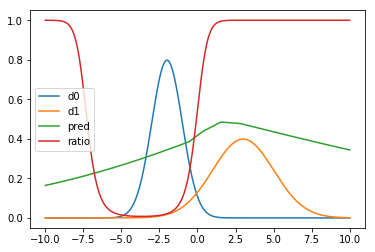

In [29]:
with torch.no_grad():
    dist = F.sigmoid(net(x_tensor)).numpy()
    
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [30]:
log_freq = 500
for i in range(20000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = F.sigmoid(net(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    net_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    
#     out = F.sigmoid(layer(x))
#     loss = F.binary_cross_entropy(out, y)
    
    out = net(x)
    loss = F.binary_cross_entropy_with_logits(out, y)
    
    loss.backward()
    net_opt.step()

Ошибка после 0 итераций: 0.611510
Ошибка после 1 итераций: 0.476684
Ошибка после 2 итераций: 0.389808
Ошибка после 3 итераций: 0.325071
Ошибка после 4 итераций: 0.276885
Ошибка после 5 итераций: 0.241122
Ошибка после 6 итераций: 0.217831
Ошибка после 7 итераций: 0.199687
Ошибка после 8 итераций: 0.187180
Ошибка после 9 итераций: 0.178333
Ошибка после 10 итераций: 0.171168
Ошибка после 11 итераций: 0.163939
Ошибка после 12 итераций: 0.159253
Ошибка после 13 итераций: 0.154195
Ошибка после 14 итераций: 0.152541
Ошибка после 15 итераций: 0.149665
Ошибка после 16 итераций: 0.149269
Ошибка после 17 итераций: 0.143781
Ошибка после 18 итераций: 0.142916
Ошибка после 19 итераций: 0.139960
Ошибка после 20 итераций: 0.140456
Ошибка после 21 итераций: 0.139855
Ошибка после 22 итераций: 0.138141
Ошибка после 23 итераций: 0.136411
Ошибка после 24 итераций: 0.136355
Ошибка после 25 итераций: 0.134665
Ошибка после 26 итераций: 0.133987
Ошибка после 27 итераций: 0.132765
Ошибка после 28 итераций: 0.13

In [31]:
with torch.no_grad():
    dist = F.sigmoid(net(x_tensor)).numpy()

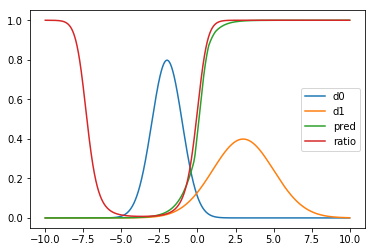

In [32]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [11]:
print([p.data[0] for p in layer.parameters()])

[tensor([ 1.5739]), tensor(0.2493)]


In [12]:
torch.log(F.sigmoid(torch.tensor(-100.)))

tensor(-inf.)

In [13]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)

In [33]:
net

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)